In [1]:
# Import numpy
import numpy as np

# Import matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import KNN and dataset from sklearn
from sklearn import neighbors, datasets

# Import Iris dataset
iris = datasets.load_iris()

In [2]:
# We only take the first two features. 
X = iris.data[:, :2]
y = iris.target

X[:2], y[:2]

(array([[5.1, 3.5],
        [4.9, 3. ]]),
 array([0, 0]))

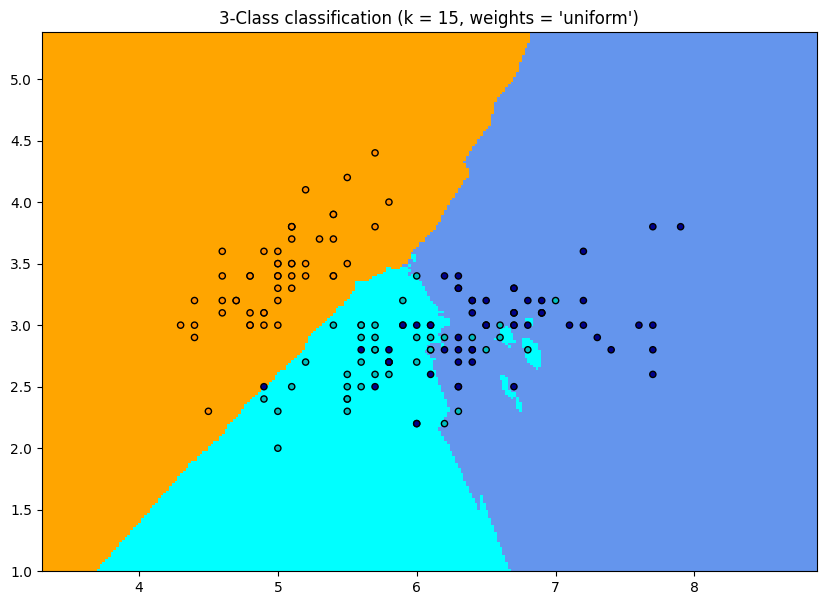

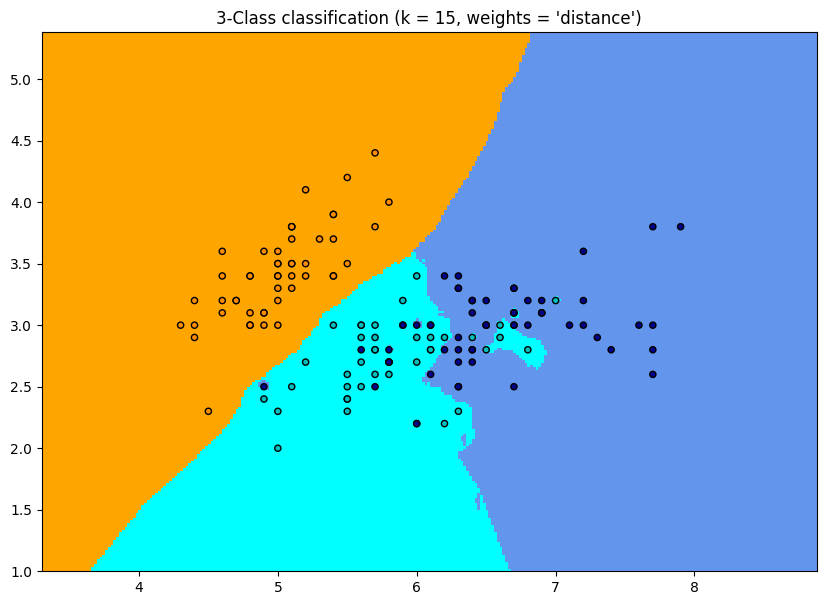

In [3]:
# Number of neighbours
n_neighbors = 15

# Step size in the mesh
h = 0.02

# Create color Maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # We create an instance of Neighbours Classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary
    # For that, we will assign a color to each Point in the mesh [x_min, x_max],[y_min, y_max]
    # Take the endpoints of the X varible
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # Take the endpoints of the Y varible
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh so that we can easily see the classified results under different mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the values using the ravel function 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 7))
    # Plot the mesh grid
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)  

    # Plot the points used to train model
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    # Set the X limits
    plt.xlim(xx.min(), xx.max())
    # Set the y limits
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))